In [1]:
from mulog.mulog_algorithm import run_mulog
from mulog.gaussian_denoisers import GaussianDenoiser
from mulog.hermitian_matrix_field.channel_decomposition import getmatrices, getmatrices_adj
from mulog.mulog_examples import run_mulog_example, MulogExampleNames, MulogExampleCase
from mulog.sar_image_rendering import SARImageRenderer

from mulog.gaussian_denoisers import (
    PREDEFINED_GAUSSIAN_DENOISER_NAMES_TO_DENOISER,
    PredefinedGaussianDenoiserNames,
)

import tifffile as tf           #tifffile是tiff文件的读取库
import pickle
import numpy as np
import sys
import os 
import gzip
import matplotlib.pyplot as plt

import enum
import strenum

In [2]:
from mulog.gaussian_denoisers import (
    PREDEFINED_GAUSSIAN_DENOISER_NAMES_TO_DENOISER,
    PredefinedGaussianDenoiserNames,
)

In [ ]:
file = open(r'C:\Users\mengy\Documents\DATA\Sentinel\qgis_process\labrador_sentinel1.pickle','rb')  # 以二进制读模式（rb）打开pkl文件
data = pickle.load(file)  # 读取存储的pickle文件
print(type(data))   # 查看数据类型
print(data.shape)
print(data[:,0,0,0])



In [3]:
sar_path = r'C:\Users\mengy\Documents\DATA\Sentinel\qgis_process\S1_xuzhou_20160805_1.tif'
img_tf = tf.imread(sar_path)
print(type(img_tf))
img_tf_transpose = np.transpose(img_tf,(2,0,1))
print(type(img_tf_transpose))
print(img_tf_transpose.shape)
print(img_tf_transpose.ndim)
print(img_tf_transpose[0,:,:])

test_img = img_tf_transpose[0,:,:]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2, 4466, 7156)
3
[[0.01206597 0.01102941 0.00738458 ... 0.00388273 0.00937837 0.05200953]
 [0.02206435 0.02312416 0.00214589 ... 0.00429706 0.00140719 0.03039235]
 [0.05280695 0.06748673 0.00365277 ... 0.00539718 0.00114307 0.00972804]
 ...
 [0.01029144 0.01326334 0.00741923 ... 0.01047822 0.00634638 0.00377881]
 [0.02977488 0.01610936 0.00698259 ... 0.02756874 0.03010402 0.00172588]
 [0.03402329 0.03262803 0.01218958 ... 0.02178752 0.04774621 0.00851728]]


In [ ]:
test = PredefinedGaussianDenoiserNames.BM3D
print(test)
test1= MulogExampleCase(
        path=r'C:\Users\mengy\Documents\VS_workspace\mulog2022-python\mulog\artifacts\labrador_sentinel1.pickle.gz',
        number_looks=1.2,
)
# full_path = os.path.join(os.path.dirname(__file__), test1.path)
with gzip.open(test1.path, "rb") as f:
        speckled_polsar_image = pickle.load(f)

print(speckled_polsar_image.shape)
print(speckled_polsar_image)

In [ ]:
getmatrices(img_tf_transpose)

In [ ]:
run_mulog_example(test1,PredefinedGaussianDenoiserNames.TV)

In [ ]:
run_mulog_example(test1,PredefinedGaussianDenoiserNames.BM3D)

In [ ]:
test_example = run_mulog(speckled_polsar_image, 1.2, PREDEFINED_GAUSSIAN_DENOISER_NAMES_TO_DENOISER[PredefinedGaussianDenoiserNames.BM3D])

sar_image_render = SARImageRenderer.from_guide(
    sar_image_guide=speckled_polsar_image
)

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].imshow(sar_image_render.render(speckled_polsar_image))
axes[0].set_title("PolSAR image with speckle")
axes[1].imshow(sar_image_render.render(test_example))
axes[1].set_title("PolSAR image processed by MuLoG")

plt.show()

# print(speckled_polsar_image)
# print(test_example)

In [4]:
test_mydata = run_mulog(test_img, 1.0, PREDEFINED_GAUSSIAN_DENOISER_NAMES_TO_DENOISER[PredefinedGaussianDenoiserNames.BM3D])

test_img_100 = np.multiply(test_img, 100000)
test_mydata_100 = np.multiply(test_mydata, 100000)

print(test_img_100)
print(test_mydata_100)

[[1206.59703389 1102.94139013  738.45754378 ...  388.27252574
   937.83717602 5200.95303655]
 [2206.43468201 2312.41639704  214.58875854 ...  429.70613576
   140.71866171 3039.2345041 ]
 [5280.69511056 6748.67331982  365.27733319 ...  539.71824236
   114.30670274  972.80386835]
 ...
 [1029.1442275  1326.33447647  741.92266911 ... 1047.82218114
   634.6384529   377.8814571 ]
 [2977.48818994 1610.93566567  698.25863466 ... 2756.87426329
  3010.40224731  172.58776352]
 [3402.32923627 3262.80333102 1218.95791963 ... 2178.75167727
  4774.62075651  851.72839463]]
[[1932.15012278+0.j 1953.54300102+0.j 1972.97840252+0.j ...
  1504.95966437+0.j 1499.57004455+0.j 1648.05659624+0.j]
 [2001.17579928+0.j 2018.26317908+0.j 1993.86578902+0.j ...
  1466.30849785+0.j 1394.8109729 +0.j 1479.19032991+0.j]
 [2099.5082061 +0.j 2132.92716961+0.j 2049.42272277+0.j ...
  1546.82154893+0.j 1434.37850432+0.j 1458.26690912+0.j]
 ...
 [2003.12111881+0.j 1884.54136821+0.j 1793.38707402+0.j ...
  1738.74692774+0.j 

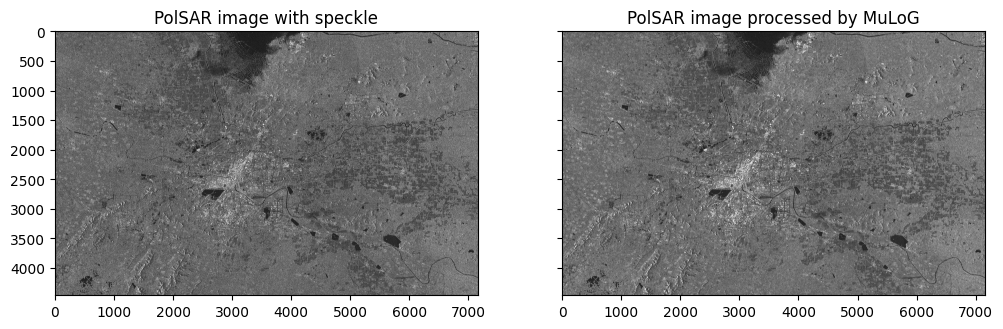

In [6]:

sar_image_render = SARImageRenderer.from_guide(
    sar_image_guide=test_img
)

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].imshow(sar_image_render.render(test_img))
axes[0].set_title("PolSAR image with speckle")
axes[1].imshow(sar_image_render.render(test_mydata))
axes[1].set_title("PolSAR image processed by MuLoG")

plt.show()



In [8]:
import math

def calculate_psnr(img1, img2, border=0):
    # img1 and img2 have range [0, 255]
    #img1 = img1.squeeze()
    #img2 = img2.squeeze()
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    h, w = img1.shape[:2]
    img1 = img1[border:h-border, border:w-border]
    img2 = img2[border:h-border, border:w-border]

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

psnr = calculate_psnr(test_img, test_mydata)
print(psnr)

C:\Users\mengy\AppData\Local\Temp\ipykernel_11280\716934768.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  img2 = img2.astype(np.float64)


77.23720723896471


In [19]:
# --------------------------------------------
# SSIM
# --------------------------------------------
import cv2

def calculate_ssim(img1, img2, border=0):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    #img1 = img1.squeeze()
    #img2 = img2.squeeze()
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    h, w = img1.shape[:2]
    img1 = img1[border:h-border, border:w-border]
    img2 = img2[border:h-border, border:w-border]

    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1[:,:,i], img2[:,:,i]))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')


def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

ssim = calculate_ssim(test_img, test_mydata)
print(ssim)



C:\Users\mengy\AppData\Local\Temp\ipykernel_11280\3900915487.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  img2 = img2.astype(np.float64)


0.9999863523394081
